In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pylab as plt

# Air Quality (Multivariate)

In [2]:
df = pd.read_csv('datasets/AirQualityUCI.csv',sep=';')
df['Date'] = pd.to_datetime(df.Date)
df['Date'] = df.Date + pd.to_timedelta(df.Time.fillna('0').map(lambda x:int(x[:2])),unit='h')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].map(lambda x:str(x).replace(',','.').replace('nan','')))
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'].map(lambda x:str(x).replace(',','.').replace('nan','')))
df['T'] = pd.to_numeric(df['T'].map(lambda x:str(x).replace(',','.').replace('nan','')))
df['RH'] = pd.to_numeric(df['RH'].map(lambda x:str(x).replace(',','.').replace('nan','')))
df['AH'] = pd.to_numeric(df['AH'].map(lambda x:str(x).replace(',','.').replace('nan','')))
df.drop('Unnamed: 15',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)
df.drop('Unnamed: 16',axis=1,inplace=True)

print(df.shape)
display(df.head())
display(df.describe())

(9471, 14)


,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


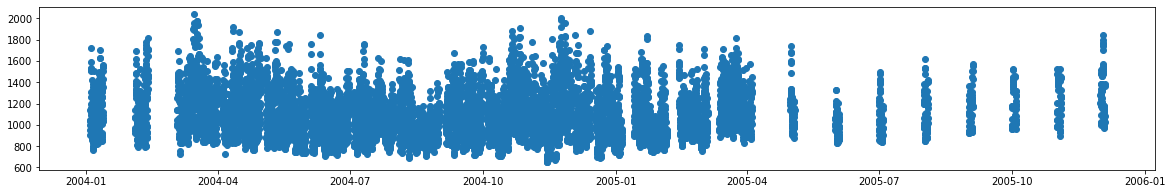

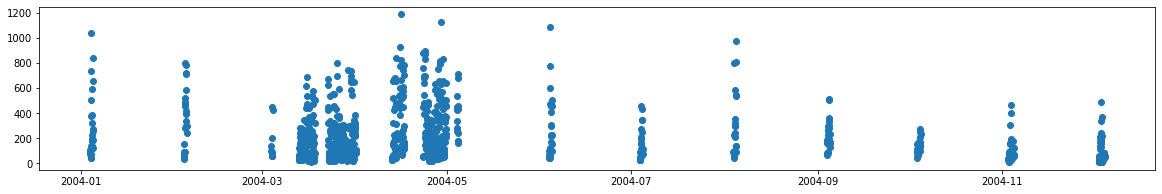

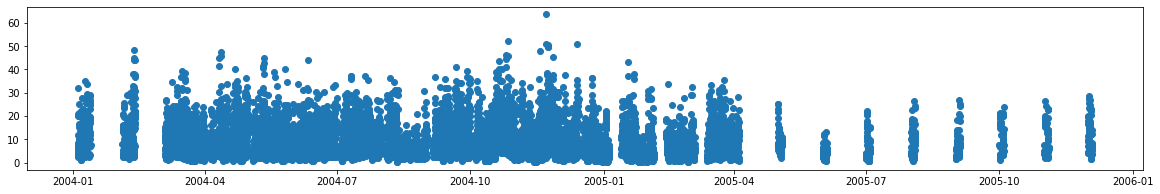

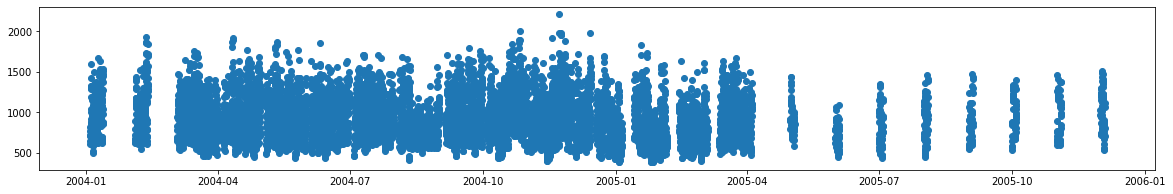

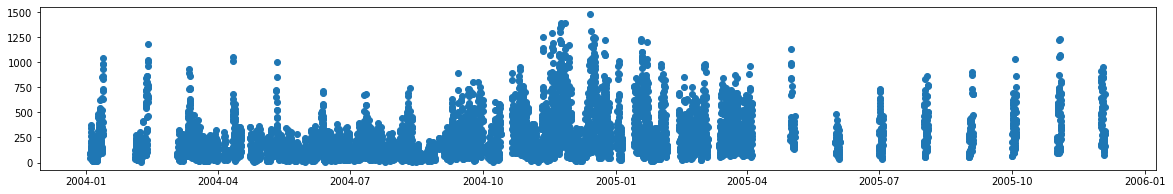

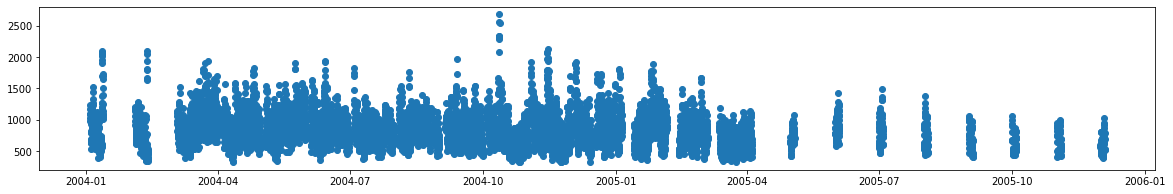

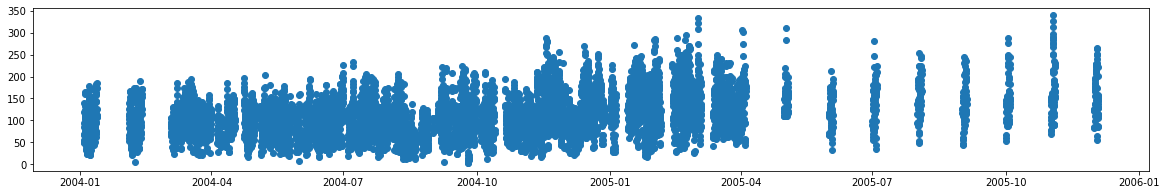

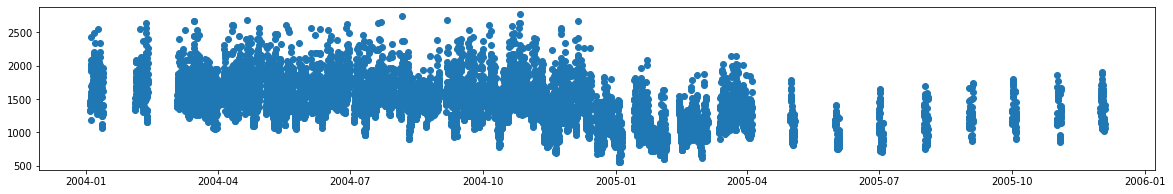

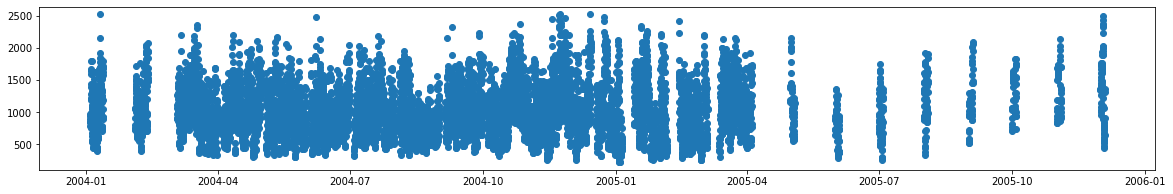

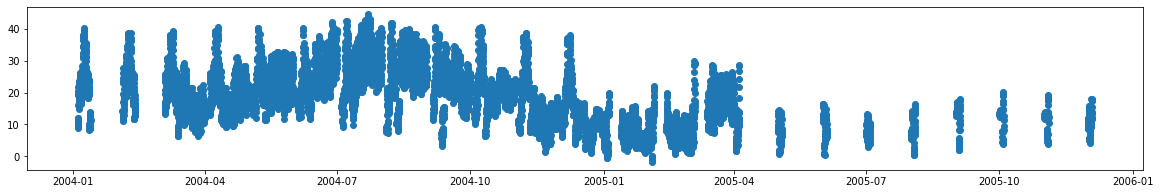

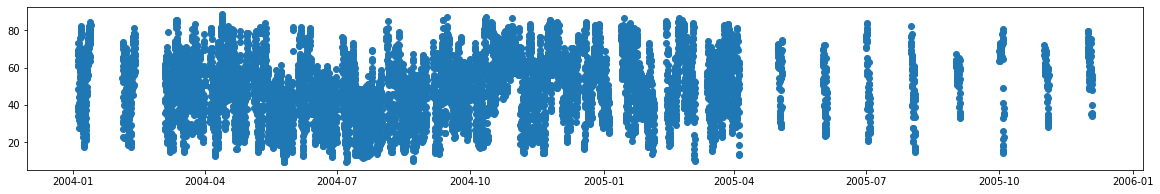

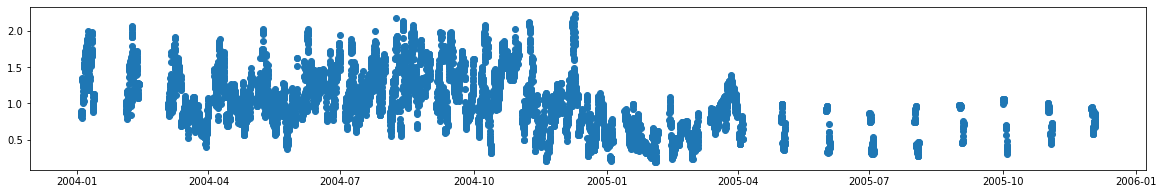

In [4]:
for col in df.columns[2:]:
    plt.figure(figsize=(20,3))
    plt.scatter(df[df[col]!=-200].Date,df[df[col]!=-200][col])

# Daily Demand Forecasting (Multivariate)

In [5]:
df = pd.read_csv('datasets/Daily_Demand_Forecasting_Orders.csv',sep=';')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


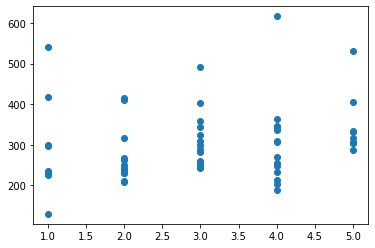

In [6]:
plt.scatter(df['Week of the month (first week, second, third, fourth or fifth week'],
            df['Target (Total orders)'])

# Dow Jones Index (univariate)

In [18]:
df = pd.read_csv('datasets/dow_jones_index.data')
df['date'] = pd.to_datetime(df.date)
df['close'] = df['close'].map(lambda x:float(x.replace('$',"")))
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


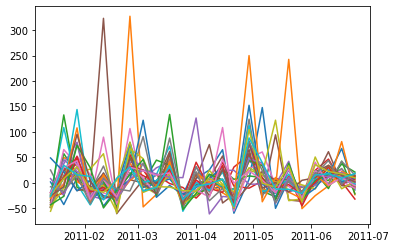

In [19]:
tickets = df.stock.unique()
for ticket in tickets:
    plt.plot(df[df.stock==ticket]['date'],df[df.stock==ticket].percent_change_volume_over_last_wk)

# Online Retail (Univariate)

In [3]:
df = pd.read_excel('datasets/Online_Retail.xlsx')

In [4]:
df['Cost'] = df.Quantity + df.UnitPrice
df['Date'] = df.InvoiceDate.dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8.55,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,9.39,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,10.75,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,9.39,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,9.39,2010-12-01


In [5]:
ts = df.groupby(['Date'])['Cost'].sum().to_frame().reset_index()

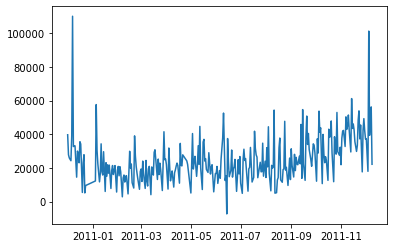

In [6]:
plt.plot(ts['Date'],ts['Cost'])

In [7]:
ts.shape

(305, 2)

# Parking Birmingham Data Set 

In [14]:
df = pd.read_csv('datasets/parking_ts.csv')
df['Time'] = pd.DatetimeIndex(df.LastUpdated)


In [15]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04 09:59:48


In [16]:
df.SystemCodeNumber.unique()

array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

/tmp/ipykernel_30764/1594087191.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


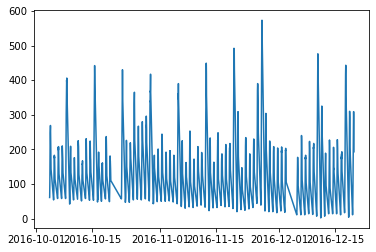

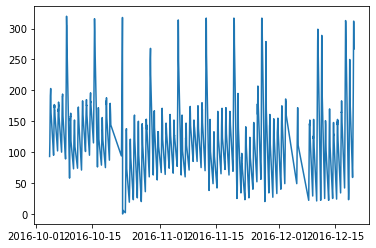

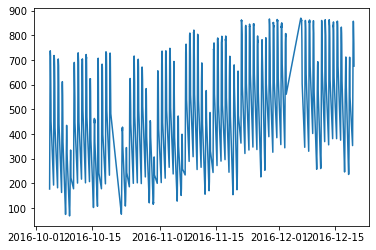

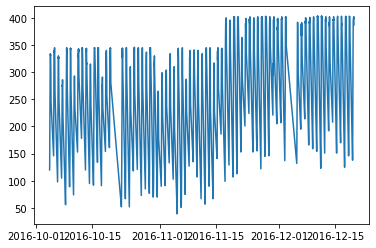

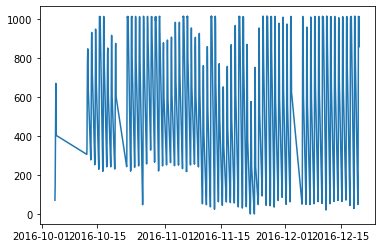

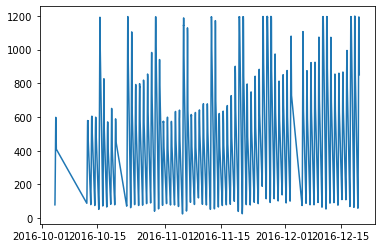

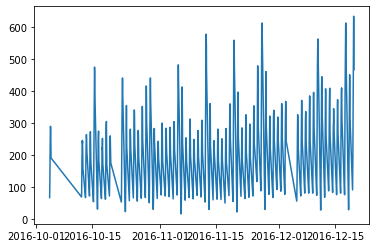

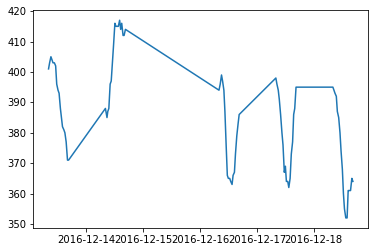

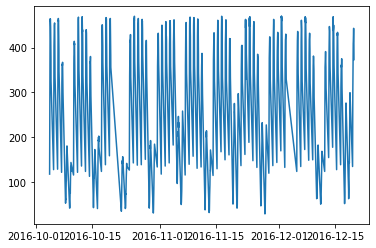

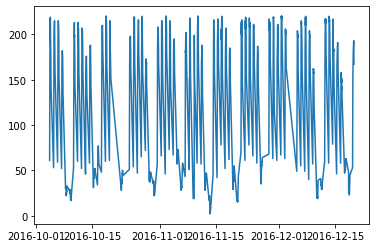

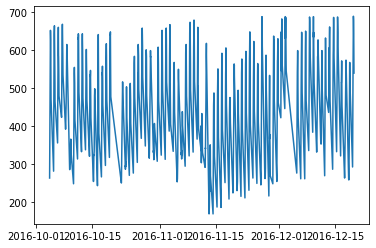

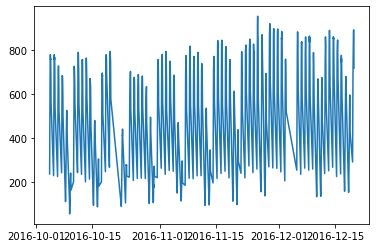

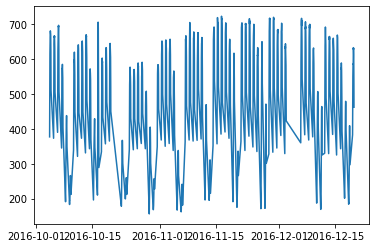

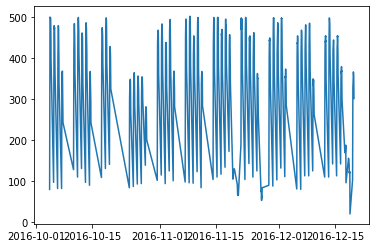

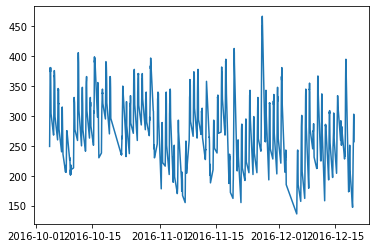

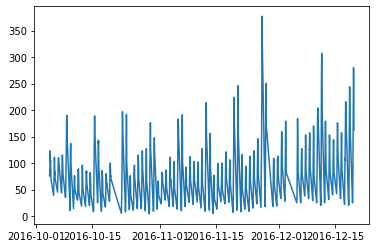

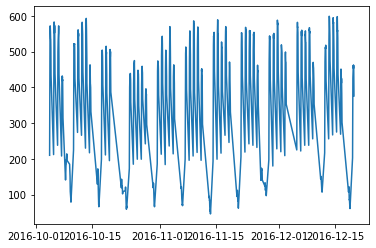

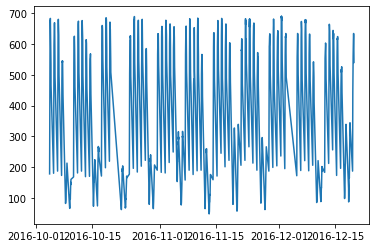

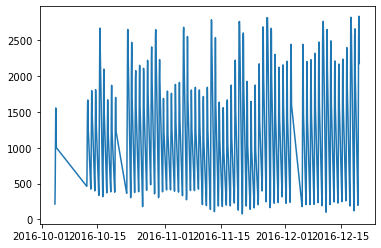

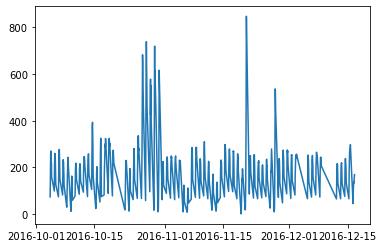

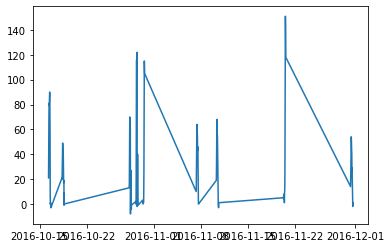

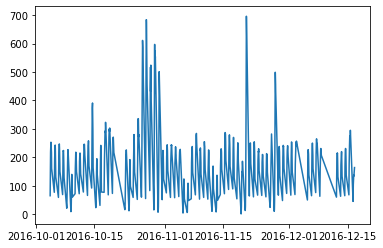

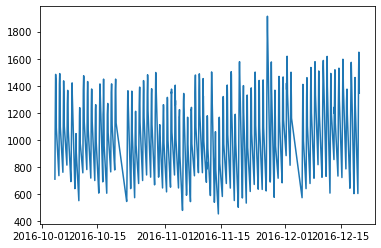

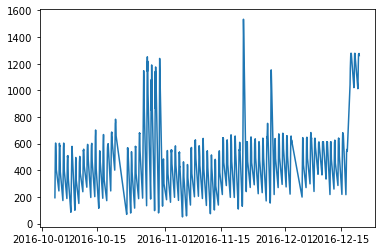

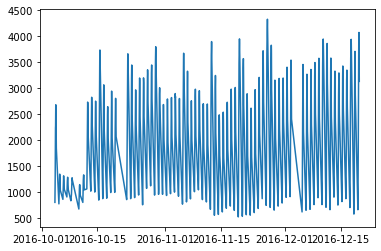

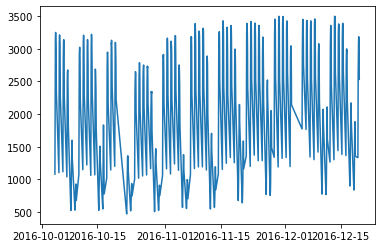

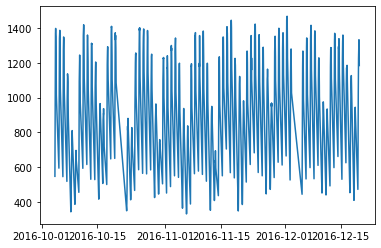

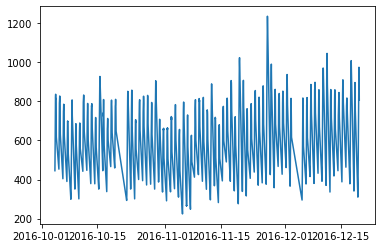

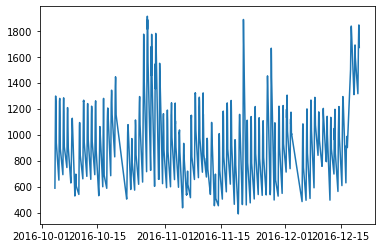

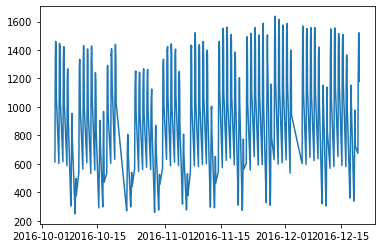

In [17]:
for code in df.SystemCodeNumber.unique():
    plt.figure()
    plt.plot(df[df.SystemCodeNumber == code]['Time'],
                df[df.SystemCodeNumber == code]['Occupancy'])

# Occupancy dataset (Multivariate)

In [17]:
df = pd.read_csv('datasets/occupancy_detection_train.txt')
df['date'] = pd.DatetimeIndex(df.date)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


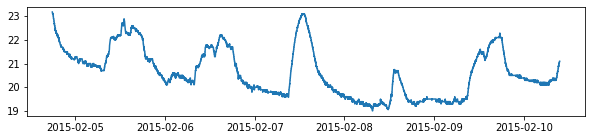

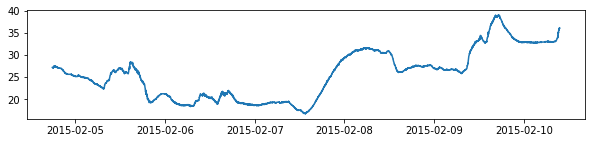

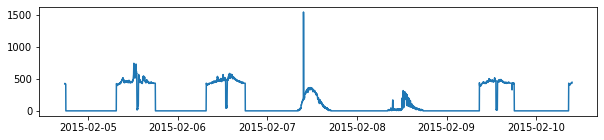

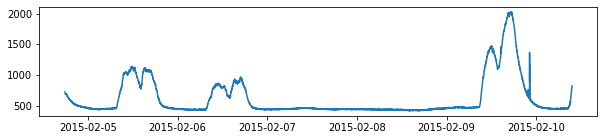

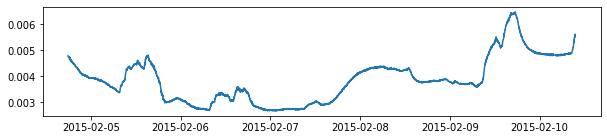

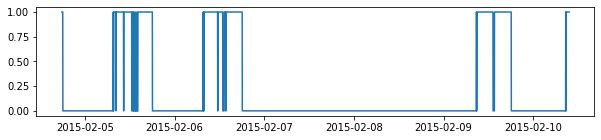

In [18]:
for col in df.columns[1:]:
    plt.figure(figsize=(10,2))
    plt.plot(df.date,df[col])

# Air Quality Beijing (Uni/Multi variate)

In [2]:
df = pd.read_csv('datasets/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv',index_col='No')
df['datetime'] = pd.to_datetime({'year':df.year,
                'month':df.month,
                'day':df.day,
                'hour':df.hour})
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
No,,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


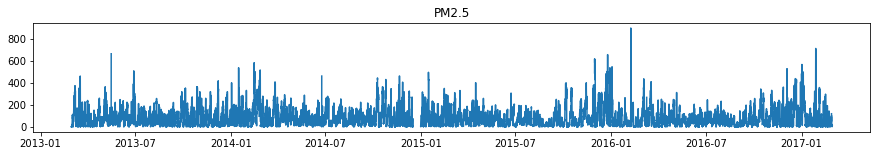

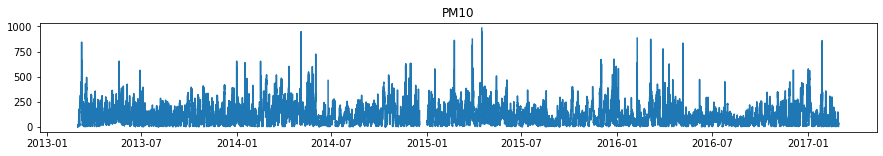

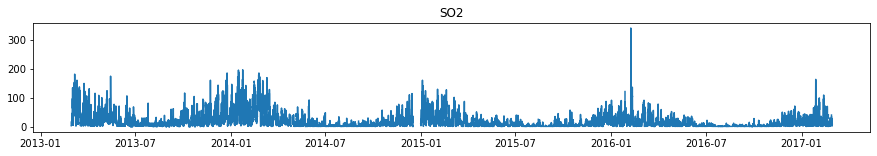

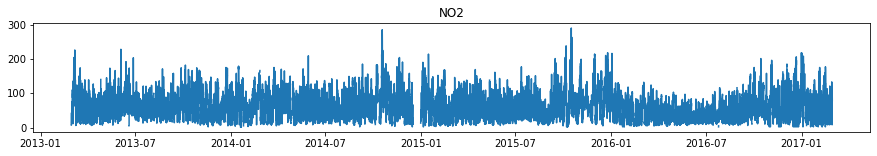

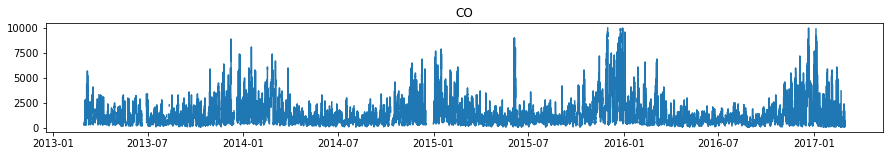

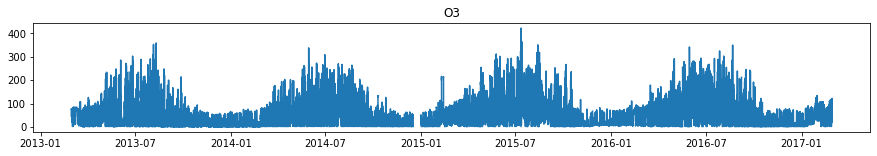

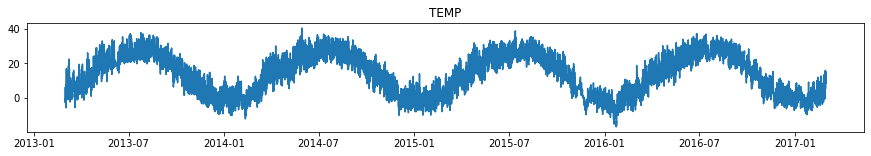

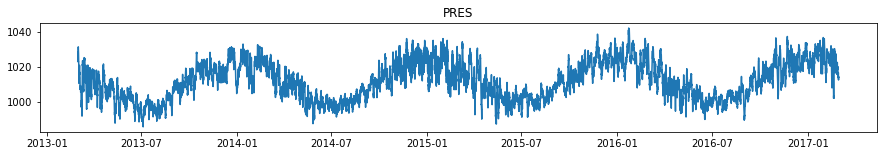

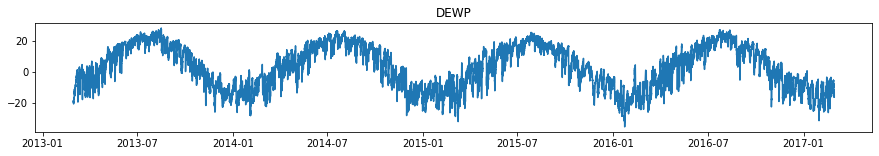

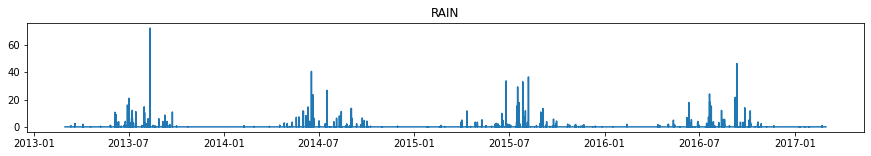

In [3]:
for col in df.columns[4:14]:
    plt.figure(figsize=(15,2))
    plt.plot(df['datetime'],df[col])
    plt.title(col)

# Bitcoint dataset

In [30]:
df = pd.read_csv('datasets/BitcoinHeistData.csv')
df = df.sort_values(['year','day'])

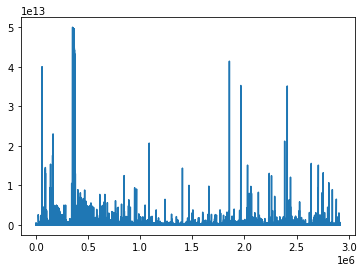

In [31]:
plt.plot(df.income)

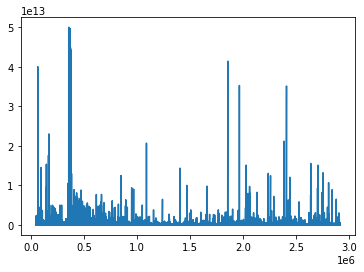

In [32]:
plt.plot(df[df.label=='white']['income'])

# Metro Interstate Traffic Volume

In [8]:
df = pd.read_csv('datasets/Metro_Interstate_Traffic_Volume.csv')
df['date_time'] = pd.to_datetime(df.date_time)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


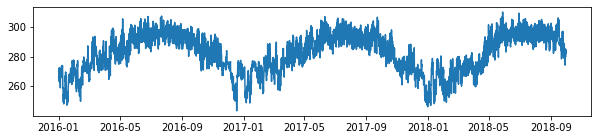

In [13]:
plt.figure(figsize=(10,2))
plt.plot(df[df.date_time>pd.Timestamp(2016,1,1,0)]['date_time'],
            df[df.date_time>pd.Timestamp(2016,1,1,0)]['temp'])

In [11]:
df.shape

(48204, 9)

# Traffic measurements

In [76]:
df = pd.read_csv('datasets/CalIt2.data',header=None).rename(columns = {1:'Date',2:'Time',3:'ncars'}).drop(columns=0)
df['Date'] = pd.DatetimeIndex(df.Date)

In [148]:
from datetime import datetime

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Hour'] = df['Time'].apply(lambda x:int(x[:2]))

df['DateTime'] = df[['Year', 'Month', 'Day', 'Hour']].apply(lambda s : datetime(*s),axis = 1)

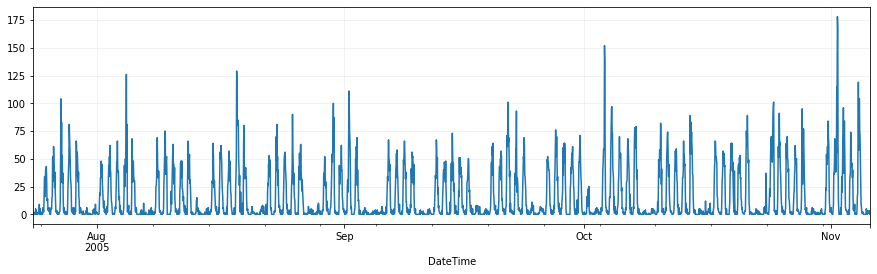

In [174]:
fig, ax = plt.subplots(1,1,figsize=(15,4))
df.groupby(['DateTime'])['ncars'].sum().plot(axes=ax)
plt.grid(alpha=0.2)